![Screenshot 2025-03-26 at 8.36.45 AM.png](<attachment:Screenshot 2025-03-26 at 8.36.45 AM.png>)
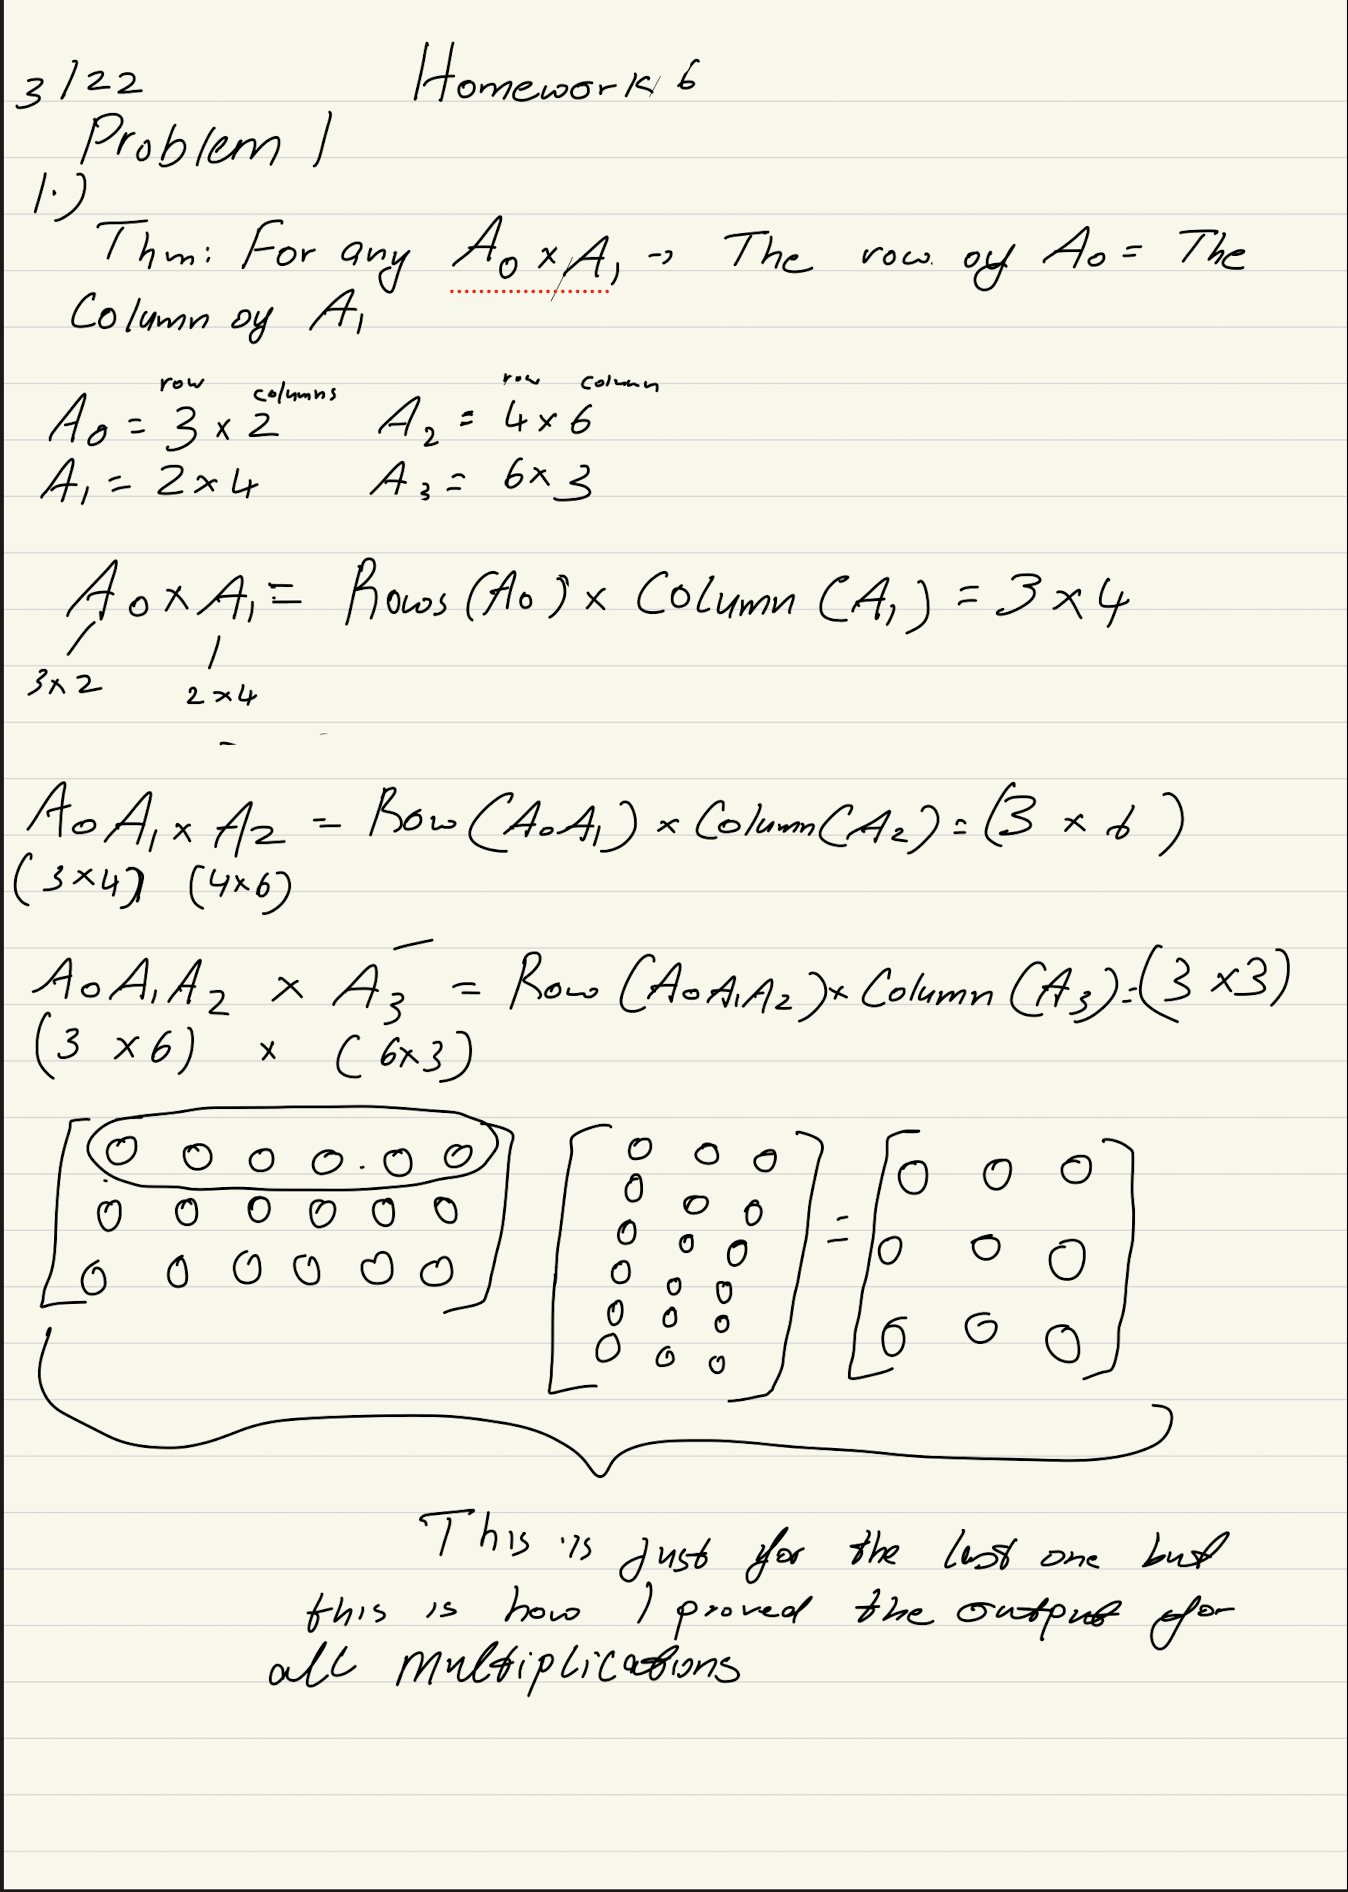

![Screenshot 2025-03-26 at 8.37.07 AM.png](<attachment:Screenshot 2025-03-26 at 8.37.07 AM.png>)
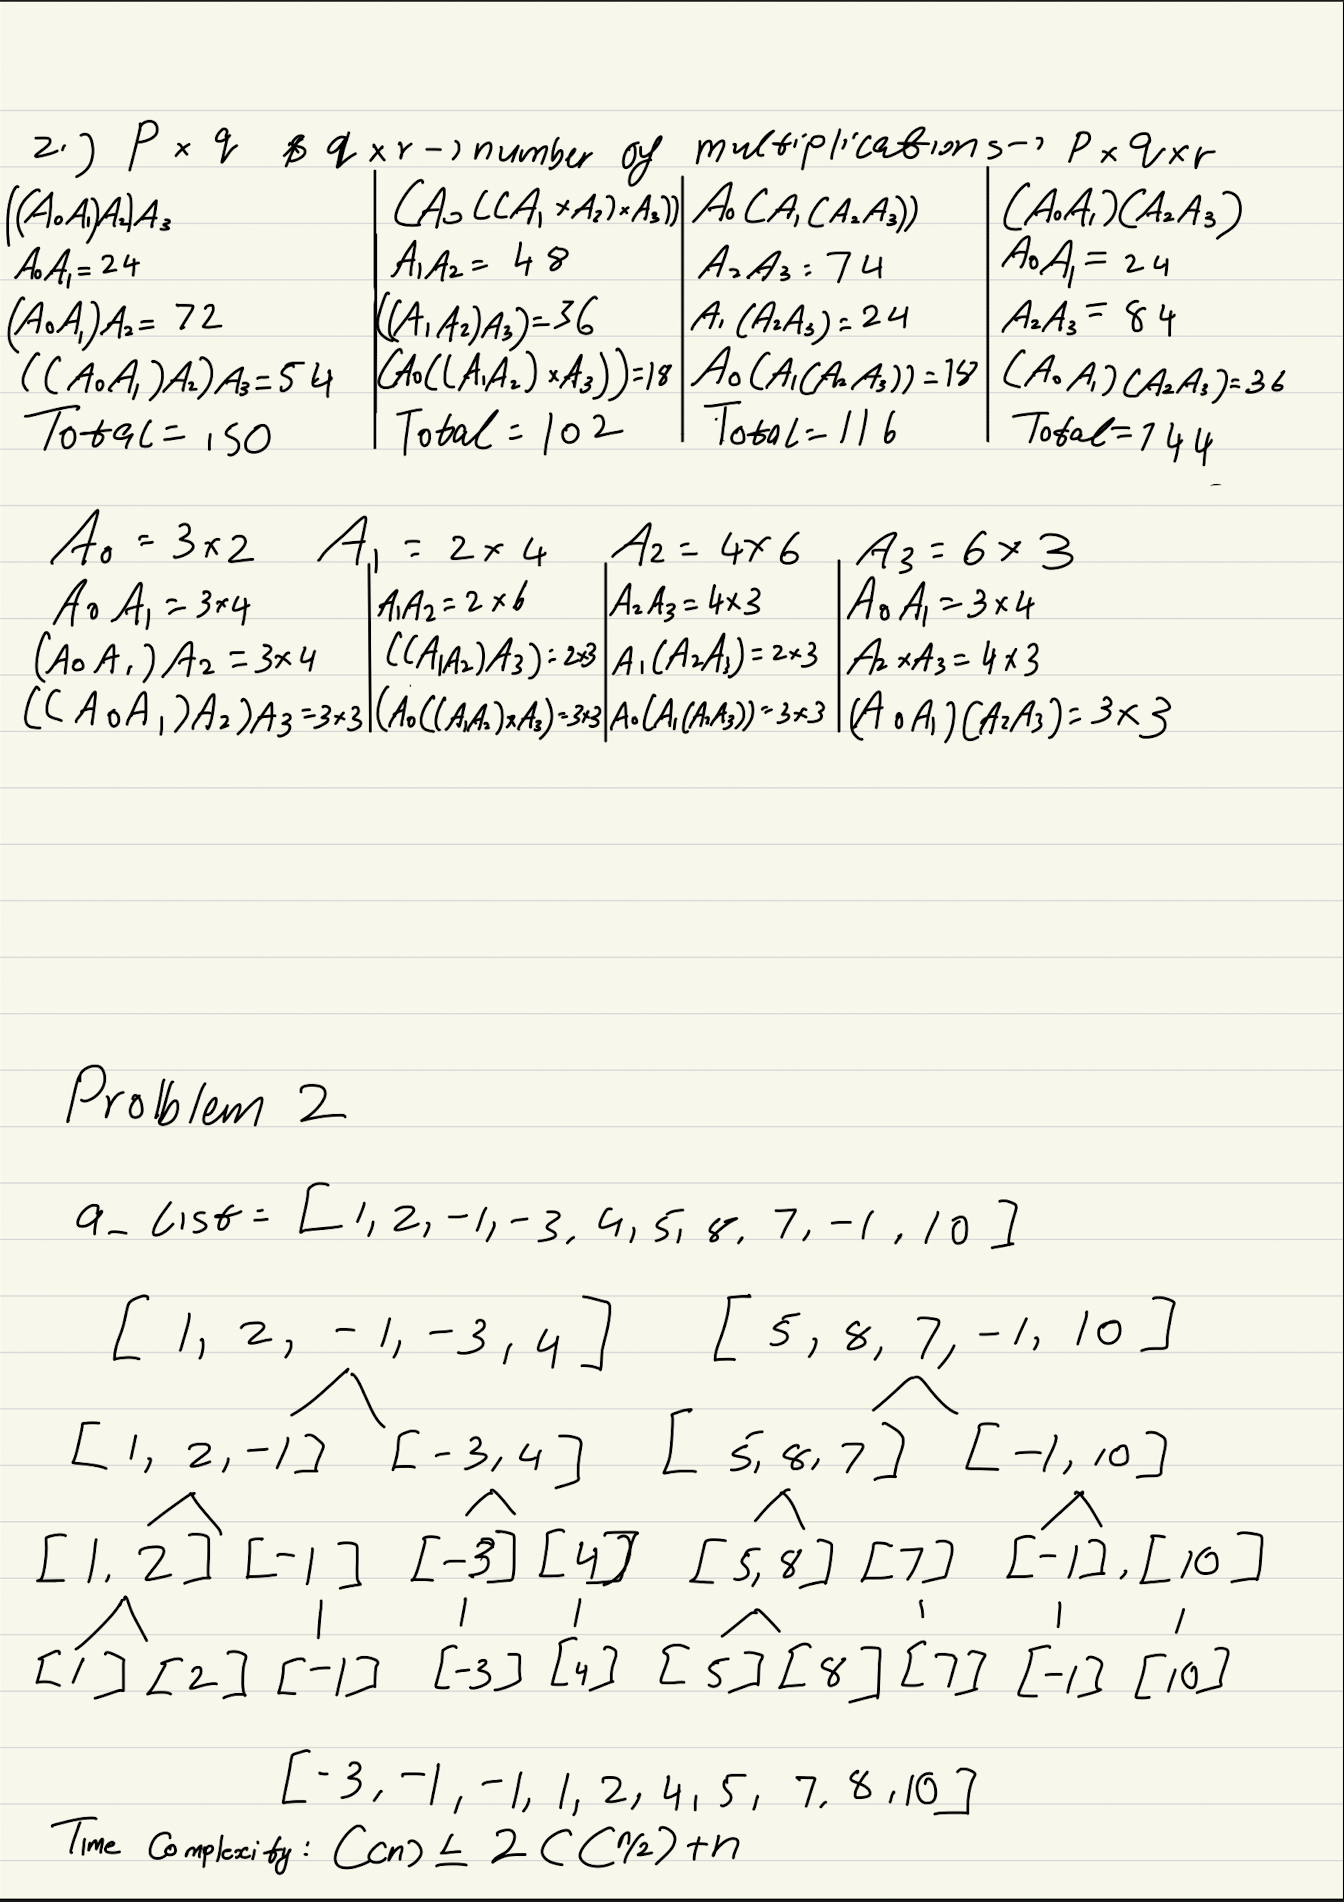

# Problem 3 (The coin change problem). 

Given an list of coin values coin list and a
target value N . During the lecture, we wrote a program to find the minimum number of
coins required to achive the total value of N. In this problem, your task is to return a
dictionary that outlines the specific counts of each coin value used to reach this optimal
solution. If multiple combinations are possible, any of those solutions is acceptable. For
example, for
coin_list = $[1 , 2 , 4]$
$N = 5$
the answer should be ${1 : 1, 4 : 1}$(there is one coin of value 1 and one coin of value 4).
On the other hand, for
coin_list = $[2 , 4 , 5]$
$N = 10$
the answer should be ${5 : 2}.$

In [9]:
def coin_change(coin_list, N):
    coin_list.sort(reverse=True)  
    result = {}  
    
    for coin in coin_list:
        if N >= coin:
            count = N // coin  
            N -= count * coin  
            result[coin] = count
            
        if N == 0:
            return result  
    
    return "Change cannot be made exactly"  


coin_list = [1, 3, 5]
N = 7
print(coin_change(coin_list, N))  


{5: 1, 1: 2}


# Problem 4. 
Implement the solution for the matrix chain problem. Specifically, sup-
pose we want to optimize the number of multiplications required to calcualte the product
A0A1 . . . An. Each matrix Ai has dimensions represented by the list $d = [d_0, d_1, . . . , d_n, d_{n+1}]$,
where $A_i$ is of size $d_i$ × $d_{i+1}$ for $0 ≤i ≤n$.
Write a function that takes d as an input and return the minimal number of multiplica-
tions required to calculate the product $A_0A_1 . . . A_n$.

In [1]:
def matrix_chain_multiplication(d):
    n = len(d) - 2
    m = [[0 for _ in range(n + 1)] for _ in range(n + 1)]
    s = [[0 for _ in range(n + 1)] for _ in range(n + 1)]  # To store split points
    
    for l in range(2, n + 2):
        for i in range(n + 2 - l):
            j = i + l - 1
            if i == j:
                m[i][j] = 0
                continue
            m[i][j] = float('inf')
            for k in range(i, j):
                cost = m[i][k] + m[k + 1][j] + d[i] * d[k + 1] * d[j + 1]
                if cost < m[i][j]:
                    m[i][j] = cost
                    s[i][j] = k  # Record the split point
    
    # Function to print the optimal parenthesization
    def print_parenthesization(s, i, j):
        if i == j:
            return f"A_{i}"
        k = s[i][j]
        left = print_parenthesization(s, i, k)
        right = print_parenthesization(s, k + 1, j)
        return f"({left} * {right})"
    
    return m[0][n], print_parenthesization(s, 0, n)

# Test with parenthesization
d = [3, 2, 4, 6, 3]
cost, parenthesization = matrix_chain_multiplication(d)
print(f"Minimum number of scalar multiplications: {cost}")
print(f"Optimal parenthesization: {parenthesization}")

Minimum number of scalar multiplications: 102
Optimal parenthesization: (A_0 * ((A_1 * A_2) * A_3))


# Problem 5. 
Given two sorted list list 1 and list 2, write a program to merge them
into a single sorted list.

In [6]:
def merge_sorted_lists(list1, list2):
    i, j = 0, 0 
    merged_list = []  

   
    while i < len(list1) and j < len(list2):
        if list1[i] < list2[j]:
            merged_list.append(list1[i])
            i += 1
        else:
            merged_list.append(list2[j])
            j += 1
    
   
    while i < len(list1):
        merged_list.append(list1[i])
        i += 1
    
   
    while j < len(list2):
        merged_list.append(list2[j])
        j += 1

    return merged_list

# Example usage
list1 = [1, 3, 5, 7]
list2 = [2, 4, 6, 8]
result = merge_sorted_lists(list1, list2)
print(result)  

[1, 2, 3, 4, 5, 6, 7, 8]
